In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Configure matplotlib to use a standard font
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'sans-serif']

# Add the project's root directory to the system path if needed
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import the analysis tools
from scripts.analysis_tools import analyze_stress_strain


In [2]:
# Load data
File_Path = "../data/InventWood/Superwood-ID24s-07302025.csv"

Length = 20 #mm
Width = 5 #mm
Height = 50 #mm
## Pre-Processing ##
Area = Length*Width*Height
df = pd.read_csv(File_Path)


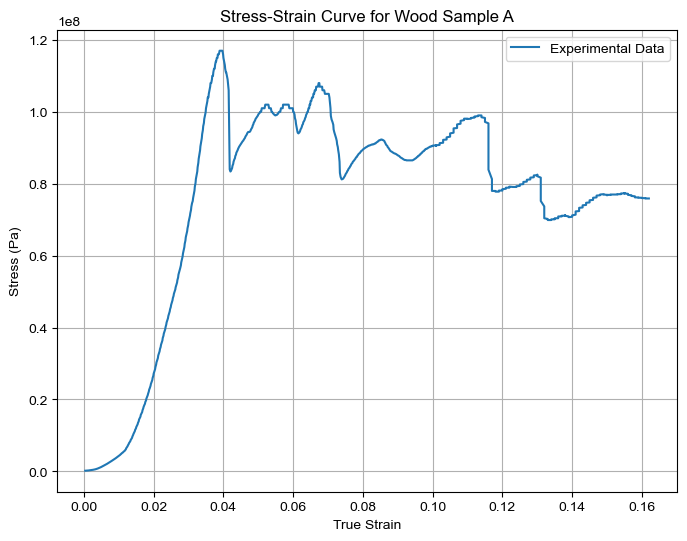

In [3]:
## Basic Plotting
# Font family is already configured in the imports section
plt.figure(figsize=(8, 6))
plt.plot(df['Strain (m/m)'], df['Stress (Pa)'], label='Experimental Data')
plt.xlabel('True Strain')
plt.ylabel('Stress (Pa)')
plt.title('Stress-Strain Curve for Wood Sample A')
plt.grid(True)
plt.legend()
plt.show()


In [4]:
## Interactive Analysis with Manual Bounds Selection
# This will create an interactive plot with sliders for selecting the linear region
# and a button to calculate material properties
print("Interactive Stress-Strain Analysis")
print("Adjust the slider to refine the linear elastic region.")
print("Click 'Calculate Properties' when you're satisfied with the bounds.")
print("The bounds will be saved for future use.")

Interactive Stress-Strain Analysis
Adjust the slider to refine the linear elastic region.
Click 'Calculate Properties' when you're satisfied with the bounds.
The bounds will be saved for future use.


In [5]:
# Create a variable to store the results getter function
results_getter = analyze_stress_strain(File_Path, interactive=True)

# To save bounds for future use, uncomment and run the following lines after selecting bounds:
# results, bounds = results_getter()
# saved_bounds = bounds  # This variable can be used in subsequent cells

Adjust the slider to refine the linear elastic region. The plot will update.
Click 'Calculate Properties' when you're satisfied with the bounds.


##### Explanation of Quality Metrics
1. $R^{2}$ Value: Coefficient of determination for the linear fit (higher is better, ideal: $>0.95$)
2. Modulus Ratio: Ratio of elastic modulus to overall curve slope (should be >1, ideal: 1.5-3)
3. Early Region Score: How early the elastic region is in the curve (higher is better)
4. Residual Score: How well the points fit the line (higher is better)
5. Data Points: Number of data points in the elastic region (more is generally better)
6. Data Coverage: Fraction of total data in the elastic region
7. Overall Quality Score: Weighted average of all metrics (higher is better, ideal: >0.8)



In [6]:
## Display Formatted Results Table Using Saved Bounds
# This section demonstrates how to use saved bounds from the interactive analysis

# Uncomment and run the following lines after selecting bounds in the interactive analysis:
# results, bounds = results_getter()
# 
# # Run the analysis with the saved bounds
# formatted_results = analyze_stress_strain(File_Path, interactive=False, 
#                                          saved_bounds=bounds, format_output=True)
# 
# # Convert to DataFrame for nice display
# results_table = pd.DataFrame.from_dict(formatted_results, orient="index", columns=["Value"])
# 
# # Display the table
# print("Material Properties and Quality Metrics (using saved bounds):")
# display(results_table)

# For subsequent runs (after kernel restart), you can use the saved bounds directly:
# Example: saved_bounds = (0.001234, 0.056789)  # Replace with your actual saved bounds
# formatted_results = analyze_stress_strain(File_Path, interactive=False, 
#                                          saved_bounds=saved_bounds, format_output=True)


In [7]:
## Calculate Material Properties with Saved Bounds
# This section demonstrates how to calculate and display all material properties
# using the bounds selected in the interactive analysis

# Uncomment and run the following lines after selecting bounds in the interactive analysis:
# results, bounds = results_getter()
# 
# # Display the saved bounds
# print(f"Using manually selected bounds: {bounds}")
# 
# # Calculate yield strength (0.2% offset method)
# # This is already implemented in the analysis_tools.py file
# 
# # Calculate all material properties
# all_results = analyze_stress_strain(File_Path, interactive=False, 
#                                    saved_bounds=bounds, format_output=True)
# 
# # Display specific properties of interest
# print("\nKey Material Properties:")
# properties_of_interest = ["Youngs Modulus (GPa)", "Yield Strength (GPa)", 
#                          "UTS (GPa)", "Toughness (kJ/m^3)", "Resilience (kJ/m^3)"]
# 
# for prop in properties_of_interest:
#     if prop in all_results:
#         print(f"{prop}: {all_results[prop]}")
# 
# # For future reference, save the bounds in a comment:
# # saved_bounds = (0.001234, 0.056789)  # Replace with your actual values
